In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

https://stackoverflow.com/questions/78757088/how-can-i-model-the-curve-of-asymmetric-peaks-using-scipy-stats-beta

In [2]:
def model(x, A, sigma, x0, xG):
    z = (x - xG) / sigma - sigma / x0
    return A / x0 * np.exp(-0.5 * np.power(sigma / x0, 2) - (x - xG) / x0) * stats.norm.cdf(z)

In [3]:
y = np.array([128459, 1822448, 10216680, 24042041, 30715114, 29537797, 25022446, 18416199, 14138783, 12116635, 9596337, 7201602, 5668133, 4671416, 3920953, 3259980, 2756295, 2326780, 2095209, 1858894, 1646824, 1375129, 1300799, 1253879, 1086045, 968363, 932041, 793707, 741462, 741593])
x = np.arange(y.size)

In [4]:
popt, pcov = optimize.curve_fit(model, x, y, p0=[1e9, 1, 5, 1], bounds=(0., np.inf))
popt, pcov

(array([2.26960267e+08, 1.04834713e+00, 4.41865938e+00, 2.74000400e+00]),
 array([[ 8.26171748e+12,  5.83045638e+04,  6.88774877e+04,
         -1.29393911e+04],
        [ 5.83045638e+04,  1.84154068e-03, -2.32977989e-03,
          4.36979802e-04],
        [ 6.88774877e+04, -2.32977989e-03,  1.31526241e-02,
         -2.46845918e-03],
        [-1.29393911e+04,  4.36979802e-04, -2.46845918e-03,
          1.28128365e-03]]))

In [5]:
np.sqrt(np.diag(pcov))

array([2.87432035e+06, 4.29131760e-02, 1.14684890e-01, 3.57950227e-02])

In [6]:
xlin = np.linspace(x.min(), x.max(), 200)
ylin = model(xlin, *popt)

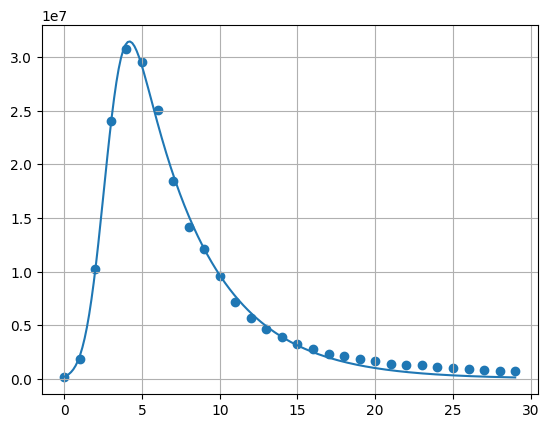

In [7]:
fig, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(xlin, ylin)
axe.grid()